In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data from the CSV file
df = pd.read_csv('extracted_values.csv')

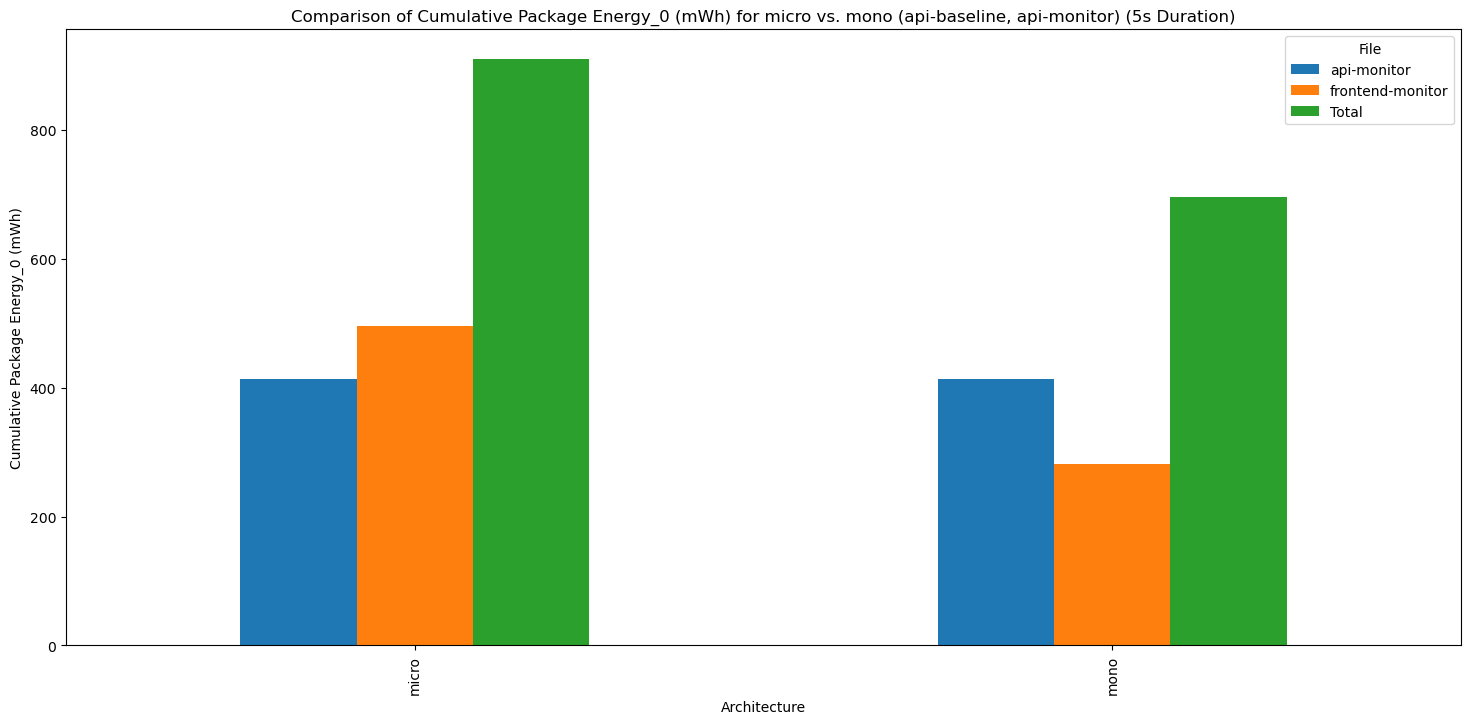

In [21]:
# Filter the DataFrame to include only "api-baseline" and "api-monitor"
filtered_df = df[df["File"].isin(["frontend-monitor", "api-monitor"])]

# Group the filtered DataFrame by "Architecture" and "File" and sum the values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (mWh)"].sum().unstack(fill_value=0)

# Calculate the total of "api-baseline" and "api-monitor"
grouped_df["Total"] = grouped_df["frontend-monitor"] + grouped_df["api-monitor"]

# Plot a bar chart for each "micro" and "mono"
grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
plt.xlabel("Architecture")
plt.ylabel("Cumulative Package Energy_0 (mWh)")
plt.title("Comparison of Cumulative Package Energy_0 (mWh) for micro vs. mono (api-baseline, api-monitor) (5s Duration)")
plt.legend(title="File")
plt.show()

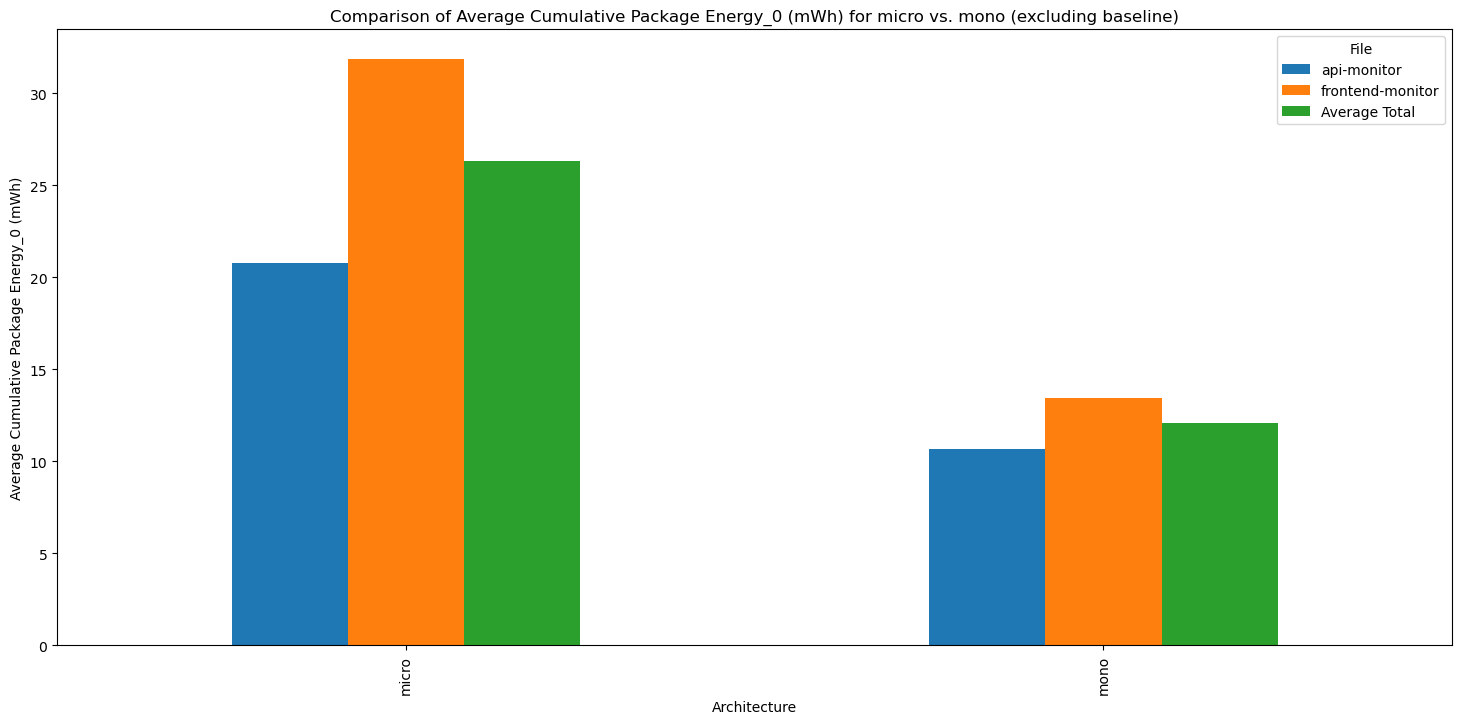

In [23]:
# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
filtered_df = df[df["DateTime"] == "19-09-23T19-32-10"]

# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = filtered_df[~filtered_df["File"].str.contains("baseline")]

# Group the filtered DataFrame by "Architecture" and "File" and calculate the average values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (mWh)"].mean().unstack(fill_value=0)

# Calculate the average total energy consumption for each architecture
grouped_df["Average Total"] = grouped_df.mean(axis=1)

# Plot a bar chart for each "micro" and "mono" including the average total
grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
plt.xlabel("Architecture")
plt.ylabel("Average Cumulative Package Energy_0 (mWh)")
plt.title("Comparison of Average Cumulative Package Energy_0 (mWh) for micro vs. mono (excluding baseline)")
plt.legend(title="File")
plt.show()

In [20]:
# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = df[~df["File"].str.contains("baseline")]
filtered_df = filtered_df[~filtered_df["File"].str.contains("frontend")]

# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
filtered_df = filtered_df[filtered_df["DateTime"] == "19-09-23T19-32-10"]

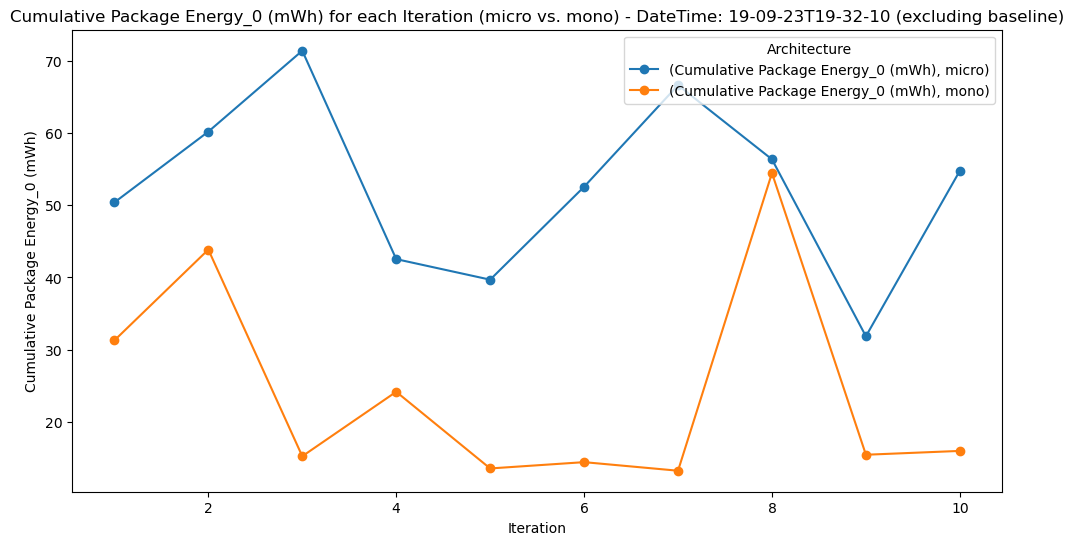

In [15]:
# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = df[~df["File"].str.contains("baseline")]
# filtered_df = filtered_df[~filtered_df["File"].str.contains("frontend")]

# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
filtered_df = filtered_df[filtered_df["DateTime"] == "19-09-23T19-32-10"]

# filtered_df
# # Pivot the filtered data to create separate columns for "micro" and "mono" Cumulative Package Energy_0 (mWh)
pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values="Cumulative Package Energy_0 (mWh)", aggfunc="sum").unstack()

# Plot a bar chart for "micro" and "mono" Cumulative Package Energy_0 (mWh) at each unique iteration
# pivoted_df.plot(kind="line", figsize=(12, 8))
pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Cumulative Package Energy_0 (mWh)")
plt.title("Cumulative Package Energy_0 (mWh) for each Iteration (micro vs. mono) - DateTime: 19-09-23T19-32-10 (excluding baseline)")
plt.legend(title="Architecture")
plt.show()

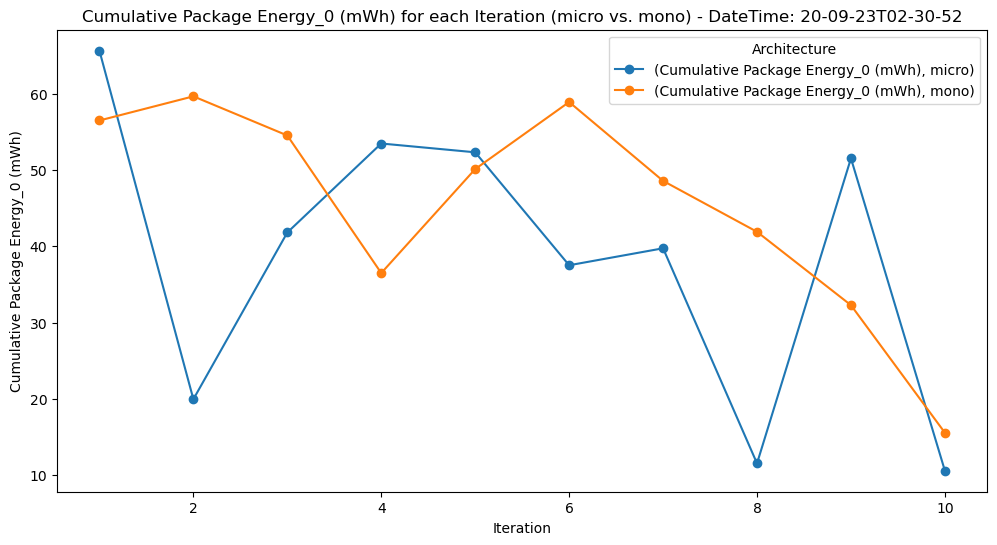

In [18]:
# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = df[~df["File"].str.contains("baseline")]
# filtered_df = filtered_df[~filtered_df["File"].str.contains("api")]

# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
filtered_df = filtered_df[filtered_df["DateTime"] == "20-09-23T02-30-52"]

# filtered_df
# # Pivot the filtered data to create separate columns for "micro" and "mono" Cumulative Package Energy_0 (mWh)
pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values="Cumulative Package Energy_0 (mWh)", aggfunc="sum").unstack()

# Plot a bar chart for "micro" and "mono" Cumulative Package Energy_0 (mWh) at each unique iteration
pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Cumulative Package Energy_0 (mWh)")
plt.title("Cumulative Package Energy_0 (mWh) for each Iteration (micro vs. mono) - DateTime: 20-09-23T02-30-52")
plt.legend(title="Architecture")
plt.show()

In [8]:
# Filter data for duration 5
# filtered_data = df[df['Duration'] == 10]
filtered_data = df[(df['Duration'] == 10) & df['File Name'].str.contains(r'\d+-api-monitor\.csv|\d+-frontend-monitor\.csv')]


# Group the data by 'Iteration' and 'Architecture' and calculate the mean of energy
grouped_data = filtered_data.groupby(['Iteration', 'Architecture'])['Cumulative Package Energy_0 (mWh)'].mean().unstack()

# Create a line chart
grouped_data.plot(kind='line', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Package Energy_0 (mWh)')
plt.title('Energy Over Time for Mono and Micro (Duration 10)')
plt.legend(title='Architecture')

# Show the plot
plt.show()

KeyError: 'Duration'

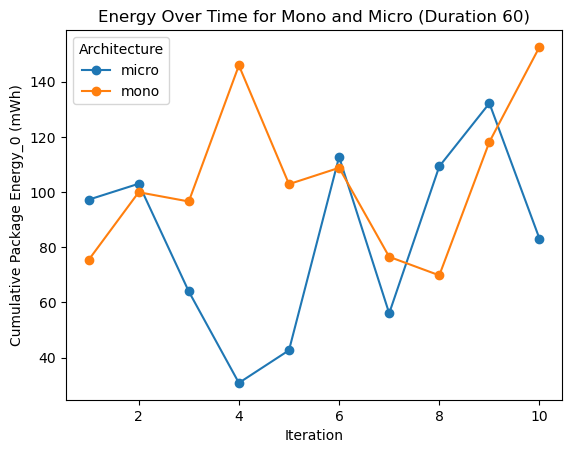

In [ ]:
# Filter data for duration 5
# filtered_data = df[df['Duration'] == 60]
filtered_data = df[(df['Duration'] == 60) & df['File Name'].str.contains(r'\d+-api-monitor\.csv|\d+-frontend-monitor\.csv')]


# Group the data by 'Iteration' and 'Architecture' and calculate the mean of energy
grouped_data = filtered_data.groupby(['Iteration', 'Architecture'])['Cumulative Package Energy_0 (mWh)'].mean().unstack()

# Create a line chart
grouped_data.plot(kind='line', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Package Energy_0 (mWh)')
plt.title('Energy Over Time for Mono and Micro (Duration 60)')
plt.legend(title='Architecture')

# Show the plot
plt.show()

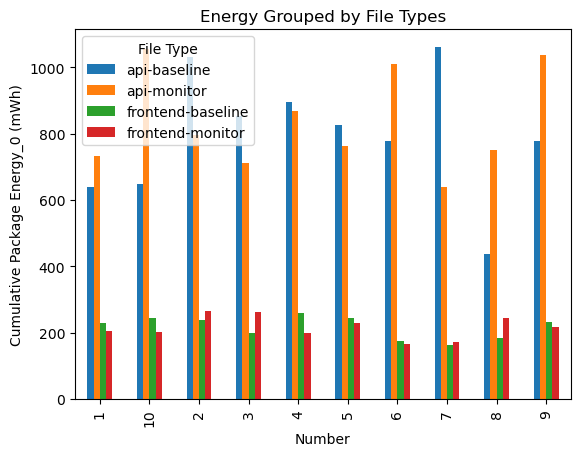

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the CSV file into a DataFrame
# df = pd.read_csv('your_csv_file.csv')

# Define the filename pattern to group by
filename_pattern = r'(\d+)-(api|frontend)-(baseline|monitor)\.csv'

# Extract the "{number}" and other parts from the 'File Name' column
df['Number'] = df['File Name'].str.extract(filename_pattern)[0]
df['File Type'] = df['File Name'].str.extract(filename_pattern)[1] + '-' + df['File Name'].str.extract(filename_pattern)[2]

# Group the data by 'Number' and 'File Type' and calculate the sum of energy
grouped_data = df.groupby(['Number', 'File Type'])['Cumulative Package Energy_0 (mWh)'].sum().unstack()

# Create a bar chart to visualize the grouped data
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Number')
plt.ylabel('Cumulative Package Energy_0 (mWh)')
plt.title('Energy Grouped by File Types')
plt.legend(title='File Type', loc='upper left')

# Show the plot
plt.show()
